# Importing Libraries & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quick Overview of Data

In [2]:
df = pd.read_csv('bgg_db.csv')

In [4]:
df.head()

,game_id,bgg_url,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,...,thumb_url,age,mechanic,owned,category,designer,publisher,weight,expands,reimplements
0,1,https://boardgamegeek.com/boardgame/1,Die Macher,3,5,240,240,240,1986,7.62437,...,https://cf.geekdo-images.com/thumb/img/Y2pmp3_...,14,"Area Majority / Influence, Auction/Bidding, Di...",6615,"Economic, Negotiation, Political",Karl-Heinz Schmiel,Hans im Glück,4.3373,NaN,NaN
1,2,https://boardgamegeek.com/boardgame/2,Dragonmaster,3,4,30,30,30,1981,6.61497,...,https://cf.geekdo-images.com/thumb/img/2tQqL6w...,12,Trick-taking,1224,"Card Game, Fantasy","G. W. ""Jerry"" D'Arcey",E.S. Lowe,1.9630,NaN,2174.0
2,3,https://boardgamegeek.com/boardgame/3,Samurai,2,4,60,30,60,1998,7.44113,...,https://cf.geekdo-images.com/thumb/img/BOzp5hz...,10,"Area Majority / Influence, Hand Management, Se...",14500,"Abstract Strategy, Medieval",Reiner Knizia,Fantasy Flight Games,2.4940,NaN,NaN
3,4,https://boardgamegeek.com/boardgame/4,Tal der Könige,2,4,60,60,60,1992,6.60429,...,https://cf.geekdo-images.com/thumb/img/aqEMohP...,12,"Action Points, Area Majority / Influence, Auct...",607,Ancient,Christian Beierer,KOSMOS,2.6667,NaN,NaN
4,5,https://boardgamegeek.com/boardgame/5,Acquire,2,6,90,90,90,1964,7.34541,...,https://cf.geekdo-images.com/thumb/img/ZODhu5g...,12,"Hand Management, Investment, Market, Ownership...",22352,Economic,Sid Sackson,3M,2.5066,NaN,NaN


In [5]:
df.shape

(116455, 24)

In [3]:
for col in df.columns:
    print(col)

game_id
bgg_url
names
min_players
max_players
avg_time
min_time
max_time
year
avg_rating
geek_rating
num_votes
rank
image_url
thumb_url
age
mechanic
owned
category
designer
publisher
weight
expands
reimplements


In [10]:
df.dtypes

game_id          int64
names           object
min_players      int64
max_players      int64
avg_time         int64
min_time         int64
max_time         int64
year             int64
avg_rating     float64
geek_rating    float64
num_votes        int64
rank           float64
age              int64
mechanic        object
owned            int64
category        object
designer        object
publisher       object
weight         float64
dtype: object

# Data Preparation

In [4]:
df.sort_values(by='rank', ascending=True, axis=0, inplace=True)
df.drop(['bgg_url', 'thumb_url', 'expands', 'reimplements', 'image_url'], axis=1, inplace=True)

# Number of Games Published each Year

First, I wanted to have a general idea how many board games are published each year:

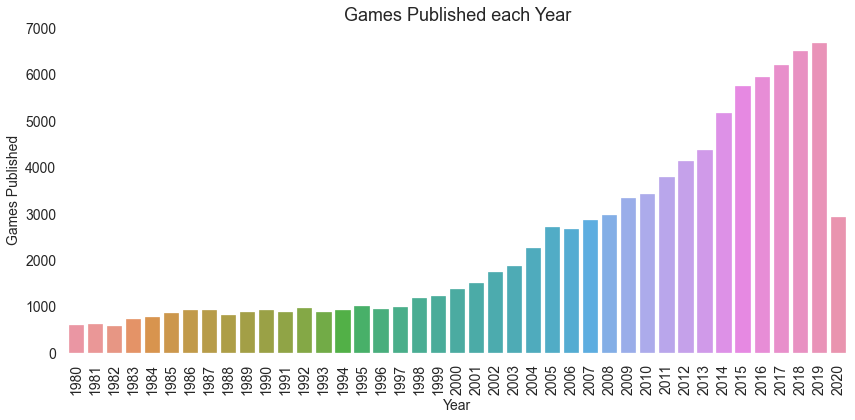

In [5]:
df_year = df[(df.year >= 1980) & (df.year <= 2020)].groupby('year')
year_counts = df_year.year.count()
plt.figure(figsize=(14, 6))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
sns.barplot(x=year_counts.index, y=year_counts)
plt.title('Games Published each Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Games Published', fontsize=14)
plt.show()

- We see a continuous rise of games published each year, with the current year as the exception. However, this behavior is normal in the industry, because many games are set to be announced in late summer, due to the fact that large fairs like the _Spiel_ in Essen happens around that time.
- Note that the dataset contains games listed on Boardgamegeek, the actual numbers will vary slightly (because someone may listed a game that actually never was published).

# Year Distribution of Average Rating & Average Geek Rating

Next, I wanted to know how the mean of the average ratings and the mean of the average geek ratings for each game behaved across the years:

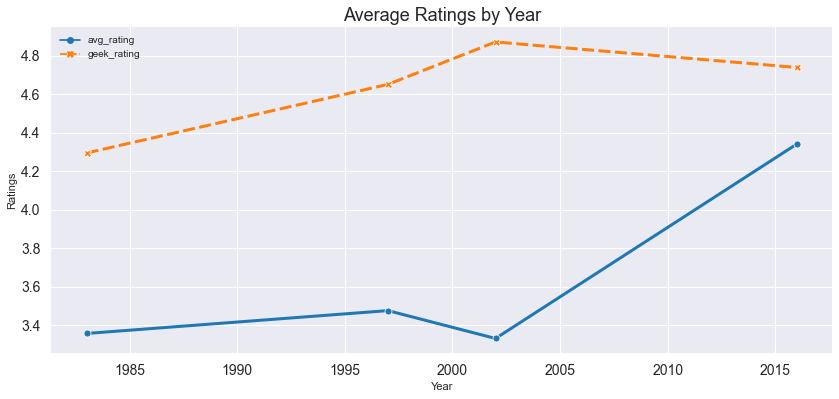

In [16]:
# Cutting extreme cases out, because games without any rating are listed as 0 instead of NaN, and I wanted to exclude games with one 10.0 rating
df_year = df[(df.avg_rating >= 0.1) & (df.avg_rating <= 4.9) & (df.geek_rating >= 0.1) & (df.geek_rating <= 4.9) & (df.year >= 1980) & (df.year <= 2020)] 
line1 = df_year.groupby('year').avg_rating.mean()
line2 = df_year.groupby('year').geek_rating.mean()
plt.figure(figsize=(14, 6))
plt.title('Average Ratings by Year', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.lineplot(data=(line1, line2), markers=True, linewidth=3)
sns.set_style('darkgrid')
plt.show()

- First, it can be observed that the mean of all average ratings is lower than the mean of the average geek ratings. This can simply be explained by the different ways of calculating both (geek rating includes other factors as simply the given ratings on boardgamegeek).
- Interestingly, both lines seem to behave synchroncically: If one goes up, the other goes down, and vice versa. 
- Also note that the average ratings significantly increased up to this day since 2002. We can conclude that people are more satiesfied with more recent games, despite the slight decrease in geek rating.

# Year Distribution of Top 300 Ranked Games

Since we concluded that people are in general more satiesfied with recent games, I wanted to know if this trend is reflected in the Top 300 Ranked Games:

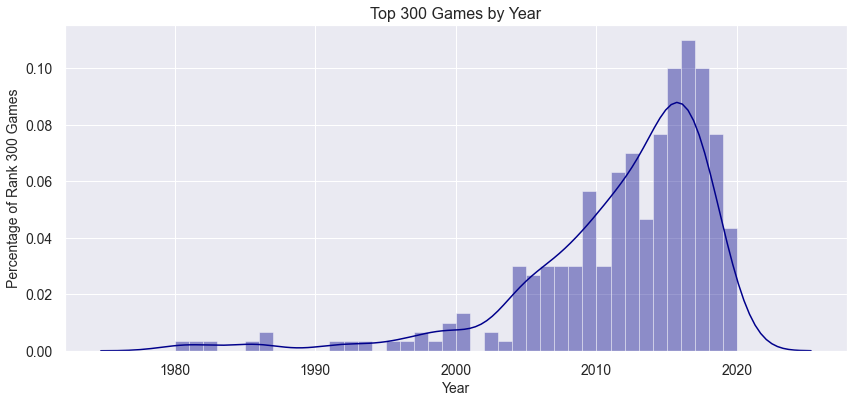

In [253]:
df_top300 = df[(df.year >= 1980) & (df.year <= 2020)][:300]
plt.figure(figsize=(14, 6))
sns.distplot(df_top300['year'], bins=40, color='darkblue')
plt.title('Top 300 Games by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Rank 300 Games', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Our hunch was right: The majority of games in the Top 300 were published in the last decade, with a center aroung 2017.

# Year Distribution of Average Weight

The feature 'weight' on Boardgamegeek represents game complexity & length and is a number between 0 and 5. What is the trend of that over the years? Let's see:

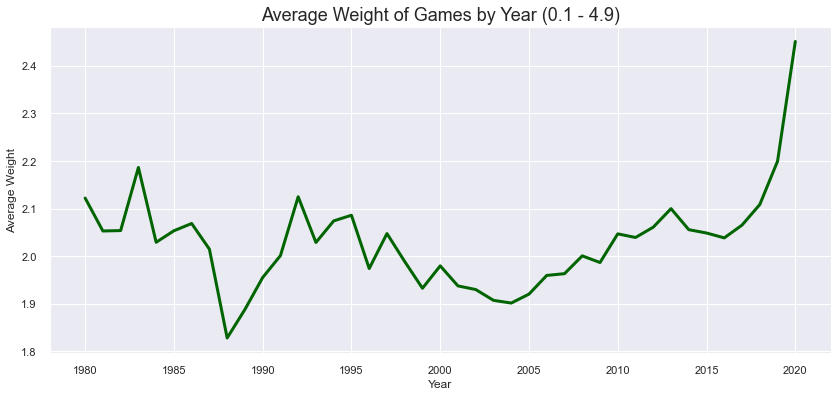

In [177]:
weight_year_narrowed = df[(df.weight >= 0.1) & (df.weight <= 4.9) & (df.year >= 1980) & (df.year <= 2020)] # Once again, cutting out extremes to get a more realistic picture
weight_year = weight_year_narrowed.groupby('year').weight.mean()
plt.figure(figsize=(14,6))
plt.title('Average Weight of Games by Year (0.1 - 4.9)', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Average Weight')
sns.lineplot(data=weight_year, color='darkgreen', linewidth=3)
sns.set(style='darkgrid')
plt.show()

- It can be stated that the average weight significantly increased in the last 3-4 years. Maybe gamers are getting more and more used to board games these days, willing to invest more time & energy into their hobby.

# Weight and Average Rating Correlation

Since games are getting more complex, how do gamers rate more complex games?

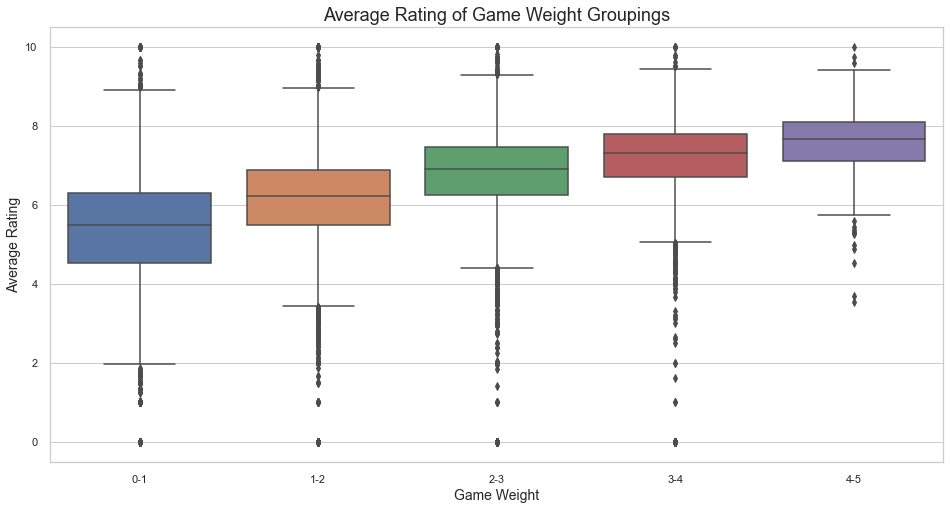

In [202]:
weight_year_narrowed = df[(df.weight >= 0.1) & (df.weight <= 4.9)]
bins = [-1, 1, 2, 3, 4, 5]
df['weight_cat'] = pd.cut(weight_year_narrowed['weight'], bins=bins, labels=bins[1:])
weight = [df[df['weight_cat'] == i]['avg_rating'] for i in range(1,6)]
plt.figure(figsize=(16, 8))
plt.title('Average Rating of Game Weight Groupings', fontsize=18)
plt.xlabel('Game Weight', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
ax = sns.boxplot(data=weight, palette='deep')
ax.set(xticklabels=['0-1', '1-2', '2-3', '3-4', '4-5'])
sns.set_style('whitegrid')
plt.show()

- We can see that the higher the weight, the higher the average ratings of games.
- My explanation for this is the fact that people who are really into more complex board games rate games more often on Boardgamegeek, since they are more involved in their hobby. Casual players who prefer lighter games may fall under the radar here.

# Top 10 Most often used Game Mechanics

Next, I questioned which game mechanics are used most often in games:

In [37]:
#Creating a new dataframe in order to count mechanics in the lists provided in df.mechanic

mechanics_lang = df.mechanic.str.split(',', expand=True) 
mechanics_lang = mechanics_lang.dropna(how='all')
mechanics_lang_num = mechanics_lang.fillna(0).apply(pd.Series.value_counts)
mechanics_lang_num = mechanics_lang_num[0].sort_values(ascending=False)

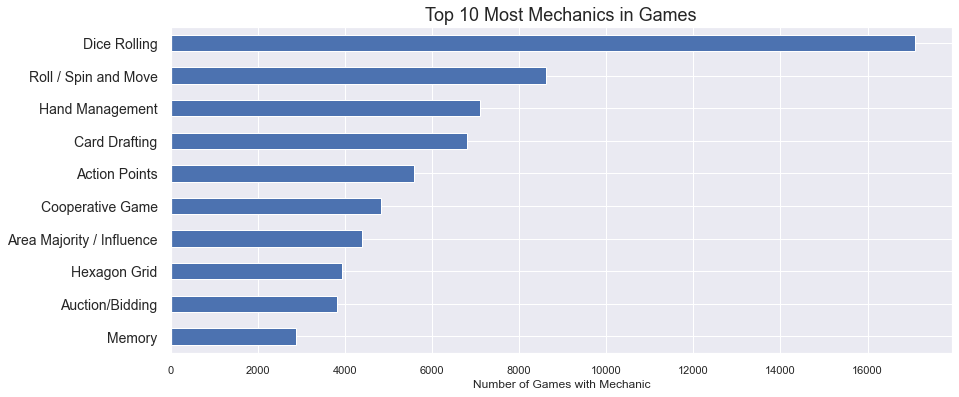

In [180]:
plt.figure(figsize=(14,6))
plt.title('Top 10 Most Mechanics in Games', fontsize=18)
plt.xlabel('Number of Games with Mechanic')
plt.ylabel('')
plt.yticks(fontsize=14)
mechanics_lang_num[:10].plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

- Quite unsurprisingly, dice rolling is the #1 most used game mechanic in games on Boardgamegeek.
- Surprisingly to me though, Roll / Spin and Move is #2, which involves chucking dice and move accordingly on the board. Quote Boardgamegeek: "This term is often used derogatorily to imply that there is no thought involved."

# Top 10 Most Publishing Game Designers

The last topic I was interested in are game designers. Which ones publish the most? Which one are deemed the 'best'? In order to answer the last question, we must discern what 'best' in an objective sense can mean in this context. There are lots of possible ways to calculate this, so I wanted to display which ones
- in general have the best average ratings in their games
- in general have the best average geek ratings in their games
- have most of their games in the top 300 rankings

hoping to find similar names in all three rankings. 

Note that I only included games with at least 2000 votes and only game designers that at least have published two games. I did this to exclude games with not enough data, and game designers which may had only one publication.

In [18]:
# Creating a new dataframe in order to count Game Designers in lists provided in df.designer:

game_designer_lang = df.designer.str.split(',', expand=True)
game_designer_lang = game_designer_lang.dropna(how='all')
game_designer_lang_num = game_designer_lang.fillna(0).apply(pd.Series.value_counts)
game_designer_lang_num = game_designer_lang_num[0].sort_values(ascending=False).drop('(Uncredited)')

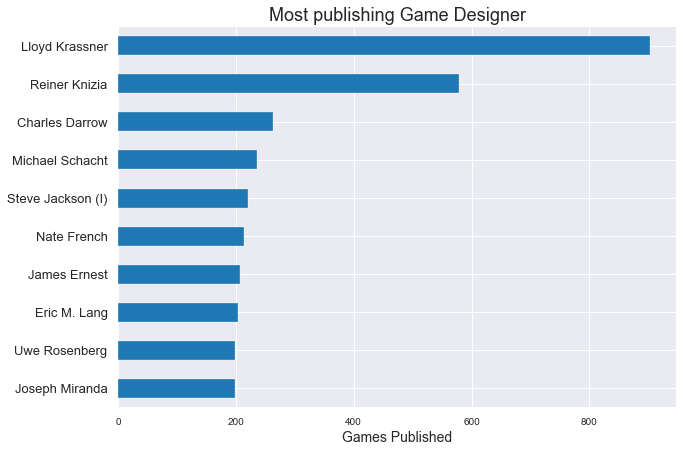

In [21]:
plt.figure(figsize=(10, 7))
plt.title('Most publishing Game Designer', fontsize=18)
plt.xlabel('Games Published', fontsize=14)
plt.yticks(fontsize=13)
game_designer_lang_num[:10].plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

Lloyd Krassner and Reiner Knizia are really getting ahead of the pack in terms of numbers, with Krassner being #1 with nearly 900 games published. Impressive!

# Top 20 Best Average Ratings Game Designers

In [23]:
concatenated = pd.concat([df, game_designer_lang], axis=1)
concatenated_grouped = concatenated[concatenated['num_votes'] > 2000].groupby(0).filter(lambda x: x[0].count() > 2)
game_designer_avg_rating = concatenated_grouped.groupby(0).avg_rating.mean().sort_values(ascending=False)
game_designer_geek_rating = concatenated_grouped.groupby(0).geek_rating.mean().sort_values(ascending=False)
game_designer_avg_rating = game_designer_avg_rating[:20]
game_designer_geek_rating = game_designer_geek_rating[:20]

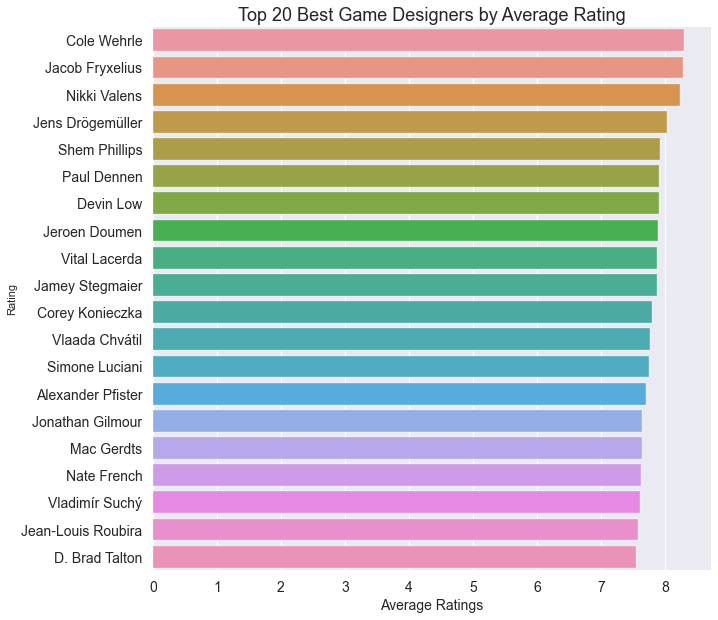

In [29]:
plt.figure(figsize=(10, 10))
sns.barplot(x=game_designer_avg_rating, y=game_designer_avg_rating.index)
plt.title('Top 20 Best Game Designers by Average Rating', fontsize=18)
plt.xlabel('Average Ratings', fontsize=14)
plt.ylabel('Rating')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

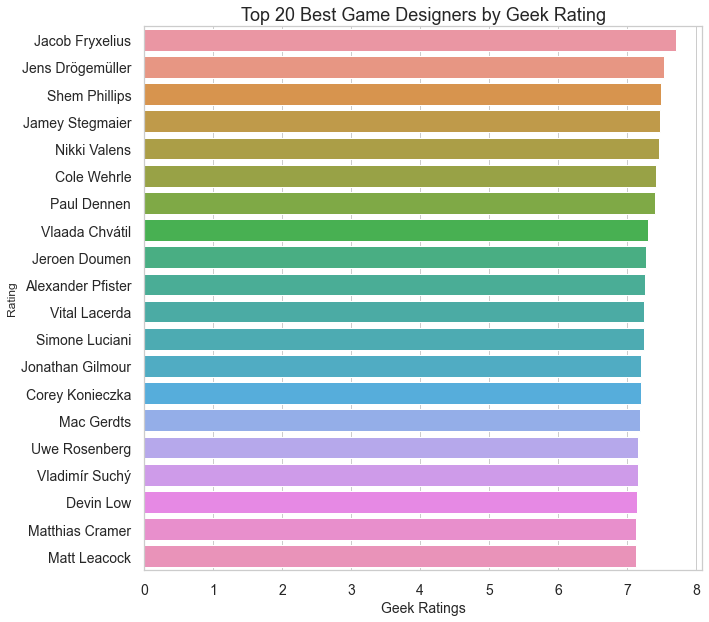

In [244]:
plt.figure(figsize=(10, 10))
sns.barplot(x=game_designer_geek_rating, y=game_designer_geek_rating.index)
plt.title('Top 20 Best Game Designers by Geek Rating', fontsize=18)
plt.xlabel('Geek Ratings', fontsize=14)
plt.ylabel('Rating')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Game Designers most often in Top 300 Ranked Games

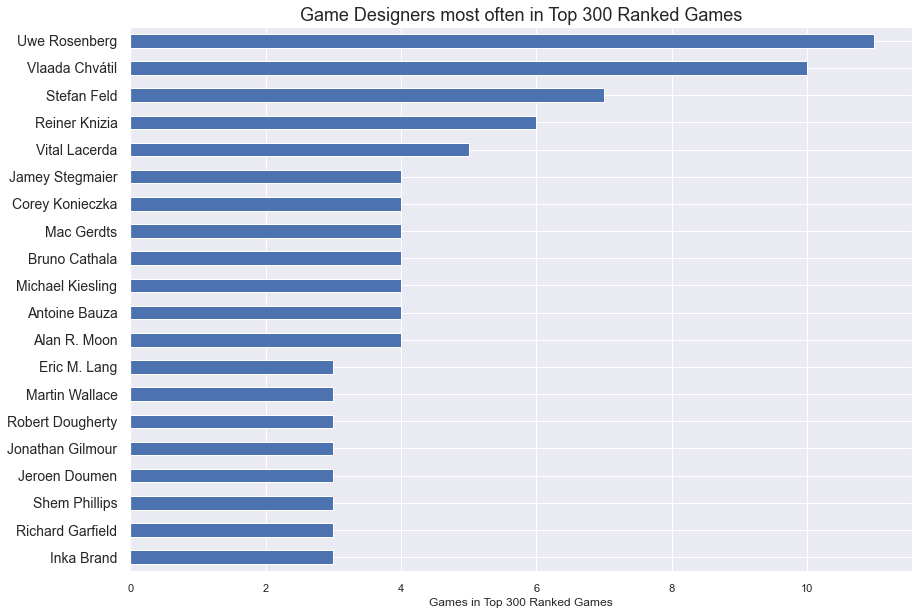

In [179]:
game_designer_lang_top300 = game_designer_lang[:300].fillna(0).apply(pd.Series.value_counts)
game_designer_lang_top300 = game_designer_lang_top300[0].sort_values(ascending=False).drop('(Uncredited)')
plt.figure(figsize=(14,10))
plt.title('Game Designers most often in Top 300 Ranked Games', fontsize=18)
plt.xlabel('Games in Top 300 Ranked Games')
plt.ylabel('')
plt.yticks(fontsize=14)
game_designer_lang_top300[:20].plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

What can we conclude from this data? Some names stand out remarkably often:
- Jacob Fryxelius, who is #1 in average geek ratings and #2 in average ratings, does not show up in the top 300 very often. This can be explained by the fact that his bestselling game _Terraforming Mars_ has many expansions, which are not in the Top 300 but are listed as games in the data, all of which have high ratings.
- The same can be said about Jens Drögemüller, who published only three games (with _Terra Mystica_ and _Gaia Project_ as his best) and some expansions.
- The rating statistics reveal that numbers are really close, whereas the top 300 ranked Game graphic show some individuals at the top that stand out: Uwe Rosenberg, Vlaada Chvátil, Stefan Feld, Reiner Knizia and Vital Lacerda. Since Stefan Feld and Reiner Knizia are in neither ratings Top 20, and Uwe Rosenberg missing in the average rating top 20, I would name Vlaada Chvátil and Vital Lacerda the most successful game designers on Boardgamegeek. However, I admit that my outcome is highly debatable, since the way I came to my conclusion included a high portion of subjectivity.

Thank you for reading! I'm always looking for ways to improve, so if you have feedback, please let me know :-)